# 여름방학 세미나_1팀_최종모델

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 최종 모델
- 단일 모델로서는 아래의 3개 모델을 best model로 선정하였음 (모델링 ipynb 참고)
  - TABNet : kaggle cost = 5005
  - LGBMRegressor : kaggle cost = 4450
  - LGBMClassifier : kaggle cost = 6565
- 다만, cost function에 대한 이해를 바탕으로 모델 최적화를 진행하였기에 해당 과정을 아래에 추가로 첨부함!

## 모델 최적화 전략
- FN에 가중치가 과도하게 부여된 만큼, FN을 줄이는 것에 집중
- test 데이터에 대한 예측값을 voting 하여 FN을 더욱 줄일 수 있음!
- Overfitting 가능성이 높은 단일 모델의 분산을 완화할 수 있음!

In [84]:
# 사용할 모델 목록
best2 = pd.read_csv('best2.csv')
best3 = pd.read_csv('best3.csv')
best1 = pd.read_csv('best1.csv')
best23 = pd.read_csv('best23.csv')
best13 =pd.read_csv('best13.csv')
best4 = pd.read_csv('best4.csv')
best5 = pd.read_csv('best5.csv')
best6 = pd.read_csv('best6.csv')
best_iso = pd.read_csv('isolation.csv')
best_reg = pd.read_csv('lgbregressor.csv')
best_reg_mice = pd.read_csv('lgbregressor_mice.csv')
best_xgb = pd.read_csv('xgbregressor_mice.csv')
best13_reg_mice = pd.read_csv('submission13_reg_mice.csv')
best_cat = pd.read_csv('catboost.csv')
best_auto = pd.read_csv('sub3 (1).csv')
last1 = pd.read_csv('last1.csv')
last2 = pd.read_csv('last2.csv')

In [85]:
# 2번째로 좋은 모델에 들어있는 1의 개수
best_reg_mice['target'].sum()

796

In [86]:
# 1번째로 좋은 모델에 들어있는 1의 개수
best13['target'].sum()

1530

In [88]:
# 1등 모델과 2등 모델을 concat해서 함께 보자
df = pd.concat([best13,best_reg_mice],axis=1)
df.drop(['ID_code'],axis=1,inplace=True)

In [89]:
df.columns=['col1','col2'] # column 이름 변경

In [90]:
# 둘 중 하나라도 1이면 1로 변환 = 1등 모델이 2등 모델의 답을 참고
conditions = (df['col1'] + df['col2']) >= 1
df.loc[conditions, 'col1'] = 1

# 결과 출력
print(df)

       col1  col2
0         0     0
1         0     0
2         1     0
3         0     0
4         0     0
...     ...   ...
20995     0     0
20996     0     0
20997     0     0
20998     0     0
20999     0     0

[21000 rows x 2 columns]


이 과정에서 1등 모델이 잘못된 결과를 참고할 수도 있지만, FN의 가중치가 250이기 때문에  
FN을 하나만이라도 낮추면 FP가 49개 올라가도 성능이 향상됨!

In [91]:
# 두 모델을 합치기 전 1의 개수 재확인
best13['target'].sum()

1530

In [92]:
# 합친 후 1의 개수 확인
df['col1'].sum()

1598

In [93]:
# 68개가 늘었음! = 68개 중 2개만 올바르게 참고해도 성능이 향상됨!! 

In [94]:
submission = pd.read_csv('sample_submission.csv') # 답 적을 답안
submission['target']=df['col1'] # 답안지에 갱신된 target을 입력!

In [95]:
# 제출하기 전, 1의 개수가 제대로 들어갔는지 확인
submission['target'].sum()

1598

In [96]:
# csv로 출력!!!
# submission.to_csv('best13_reg_mice.csv',index=False)

## 실질적 최종모델
- TABNet + LGBMClassifier + LGBMRegressor
- 해당 모델에서 구한 submission : best13_reg_mice.csv
- 세부 과정은 아래 표 참고

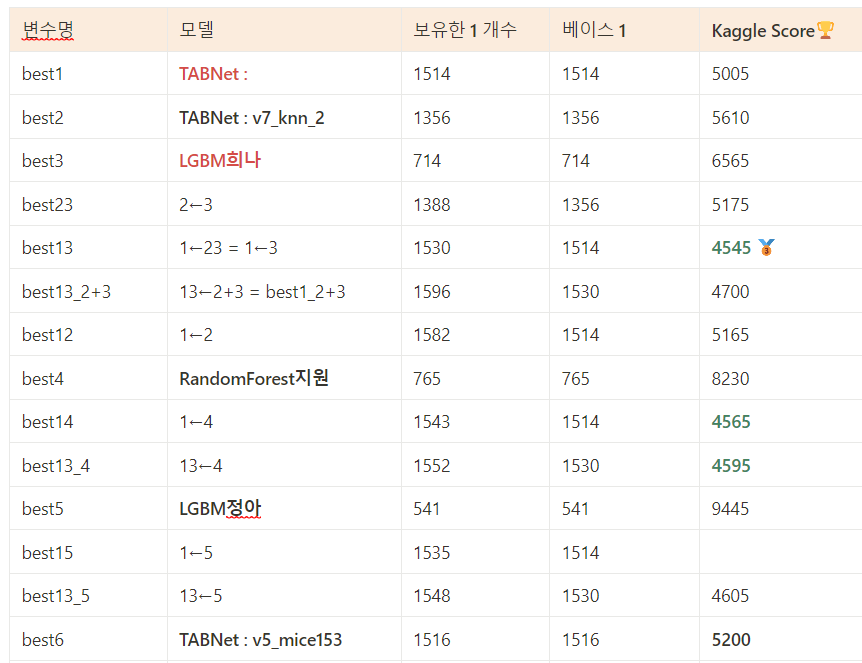

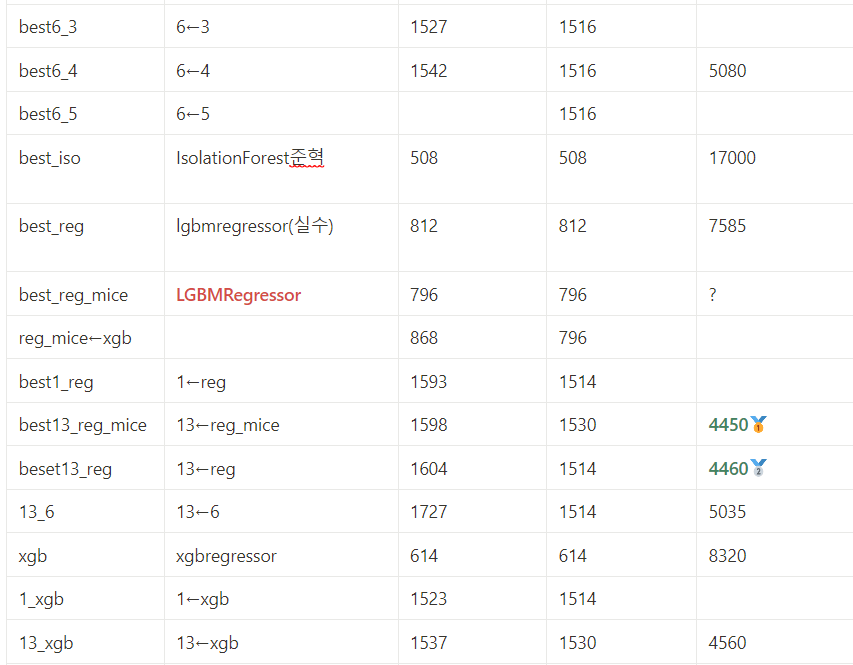